In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('fifa21_male2.csv')

C:\Users\Paco Alcaide\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [4]:
df.info()

df.info ( verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 107 columns):
 #    Column            Dtype  
---   ------            -----  
 0    ID                int64  
 1    Name              object 
 2    Age               int64  
 3    OVA               int64  
 4    Nationality       object 
 5    Club              object 
 6    BOV               int64  
 7    BP                object 
 8    Position          object 
 9    Player Photo      object 
 10   Club Logo         object 
 11   Flag Photo        object 
 12   POT               int64  
 13   Team & Contract   object 
 14   Height            object 
 15   Weight            object 
 16   foot              object 
 17   Growth            int64  
 18   Joined            object 
 19   Loan Date End     object 
 20   Val

In [5]:
data_fifa = df[["Attacking", "Finishing", "Heading Accuracy", "Volleys", "Shot Power", "Jumping", "Dribbling", "Ball Control", "Acceleration", "Sprint Speed", "Long Shots", "Vision"]]
data_fifa

,Attacking,Finishing,Heading Accuracy,Volleys,Shot Power,Jumping,Dribbling,Ball Control,Acceleration,Sprint Speed,Long Shots,Vision
0,313,50,59,58.0,74,68.0,73,71,68,74,68,66.0
1,337,64,61,68.0,75,54.0,69,71,56,50,71,73.0
2,337,64,41,75.0,72,58.0,79,78,48,42,69,74.0
3,264,70,60,NaN,63,NaN,68,77,59,62,59,NaN
4,367,69,54,79.0,67,40.0,85,90,61,56,70,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17120,197,23,66,26.0,48,70.0,44,56,52,55,28,29.0
17121,248,43,50,41.0,51,62.0,57,54,61,63,48,53.0
17122,218,34,53,34.0,28,61.0,52,47,66,61,37,45.0
17123,223,26,52,23.0,51,72.0,55,57,72,70,33,56.0


In [6]:
corr_data = data_fifa.select_dtypes([np.number])
correlations_matrix = corr_data.corr(method='spearman')
correlations_matrix

,Attacking,Finishing,Heading Accuracy,Volleys,Shot Power,Jumping,Dribbling,Ball Control,Acceleration,Sprint Speed,Long Shots,Vision
Attacking,1.000000,0.865785,0.451964,0.904663,0.823921,0.157708,0.839036,0.865886,0.445055,0.430396,0.877718,0.777180
Finishing,0.865785,1.000000,0.280201,0.872463,0.742327,0.044772,0.765493,0.721251,0.495094,0.473418,0.843016,0.664365
Heading Accuracy,0.451964,0.280201,1.000000,0.308701,0.343812,0.447933,0.187611,0.326034,-0.032481,0.056255,0.298065,0.121611
Volleys,0.904663,0.872463,0.308701,1.000000,0.780055,0.068862,0.760063,0.742217,0.444504,0.417239,0.846750,0.686139
Shot Power,0.823921,0.742327,0.343812,0.780055,1.000000,0.130370,0.690027,0.720444,0.309810,0.306863,0.844182,0.680794
Jumping,0.157708,0.044772,0.447933,0.068862,0.130370,1.000000,0.044992,0.115314,0.082663,0.122940,0.084115,0.014218
Dribbling,0.839036,0.765493,0.187611,0.760063,0.690027,0.044992,1.000000,0.901457,0.630423,0.581106,0.788775,0.775816
Ball Control,0.865886,0.721251,0.326034,0.742217,0.720444,0.115314,0.901457,1.000000,0.481069,0.443773,0.793494,0.798034
Acceleration,0.445055,0.495094,-0.032481,0.444504,0.309810,0.082663,0.630423,0.481069,1.000000,0.906765,0.428299,0.374024
Sprint Speed,0.430396,0.473418,0.056255,0.417239,0.306863,0.122940,0.581106,0.443773,0.906765,1.000000,0.396632,0.321920


In [7]:
df['Hits'] = df['Hits'].str.replace('K', '')
df["Hits"] = pd.to_numeric(df["Hits"])

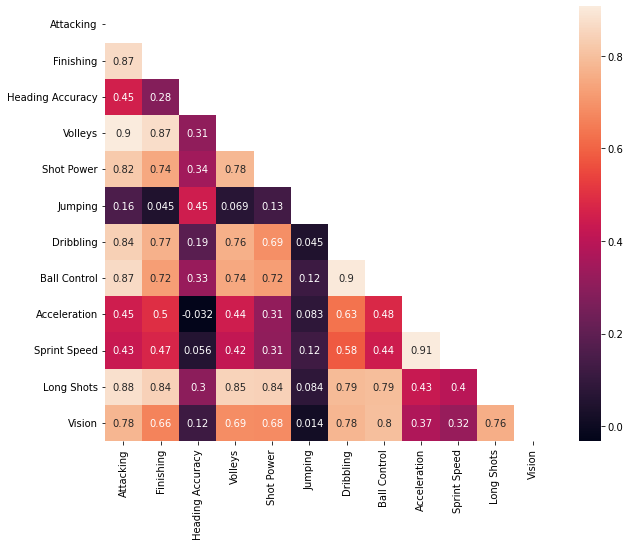

In [8]:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()